# set-up

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.patches as mpatches
import numpy as np
from adjustText import adjust_text
import json

In [12]:
plt.rcParams.update({'font.size': 16})

In [13]:
os.chdir('../validation_output')

In [14]:
#colormap = cm.get_cmap('twilight')  # You can choose any colormap
colormap=cm.get_cmap('tab20b')

/tmp/ipykernel_3843182/629261005.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('tab20b')


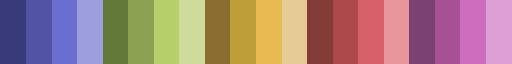

In [15]:
colormap

In [16]:
os.listdir()

['GWAS_cat_val_fig.tar.gz',
 'MGI_val_depth-0.svg',
 'MGI_val_depth-4.svg',
 'MGI_enr_seed_genes-ext_top500_PCNet2.0_enr.csv',
 'GWAS_cat_val_fig',
 'MGI_enr_loco_gsem_FDR_ext_top500_PCNet2.0_enr.csv',
 'GWAS_enr_loco_gsem_FDR_ext_top500_PCNet2.0_enr.csv',
 '.ipynb_checkpoints',
 'MGI_val_depth-0.tiff',
 'MGI_val_depth-5.svg',
 'parent_node_hm_rn_enr_MGI_neuro.csv',
 'GWAS_catalog_parent_terms.txt',
 'MGI_enr_seed_genes-loco_gsem_FDR_PCNet2.0_enr.csv',
 'MGI_val_depth-1.svg',
 'MGI_val_depth-3.svg',
 'MGI_val_depth-2.svg']

# import datasets

In [17]:
with open('GWAS_catalog_parent_terms.txt') as json_file:
    par_dict = json.load(json_file)

In [18]:
GC=pd.read_csv('GWAS_enr_loco_gsem_FDR_ext_top500_PCNet2.0_enr.csv')

In [19]:
MGI=pd.read_csv('MGI_enr_loco_gsem_FDR_ext_top500_PCNet2.0_enr.csv')

In [20]:
par_dict=MGI[MGI['depth']==1][['trait','parent_trait']]
par_dict.index=par_dict.trait
par_dict=par_dict['parent_trait'].to_dict()

In [21]:
MGI[MGI.parent_trait=='abnormal behavioral response to addictive substance']['trait'][2011]

'enhanced behavioral response to addictive substance'

In [22]:
MGI[MGI.trait=='enhanced behavioral response to addictive substance']

,trait,parent_trait,network_genes,odds_ratio,log_se_or,p_intersect,depth
1734,enhanced behavioral response to addictive subs...,enhanced behavioral response to xenobiotic,"{'ADGRL3', 'DLG4', 'GABRB1', 'CYFIP2', 'PRKCG'...",9.308511,0.414961,0.000026,4
2011,enhanced behavioral response to addictive subs...,abnormal behavioral response to addictive subs...,"{'ADGRL3', 'DLG4', 'GABRB1', 'CYFIP2', 'PRKCG'...",9.308511,0.414961,0.000026,4


In [23]:
MGI=MGI.drop_duplicates('trait').reset_index()

# plot MGI

/tmp/ipykernel_3843182/3792994221.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


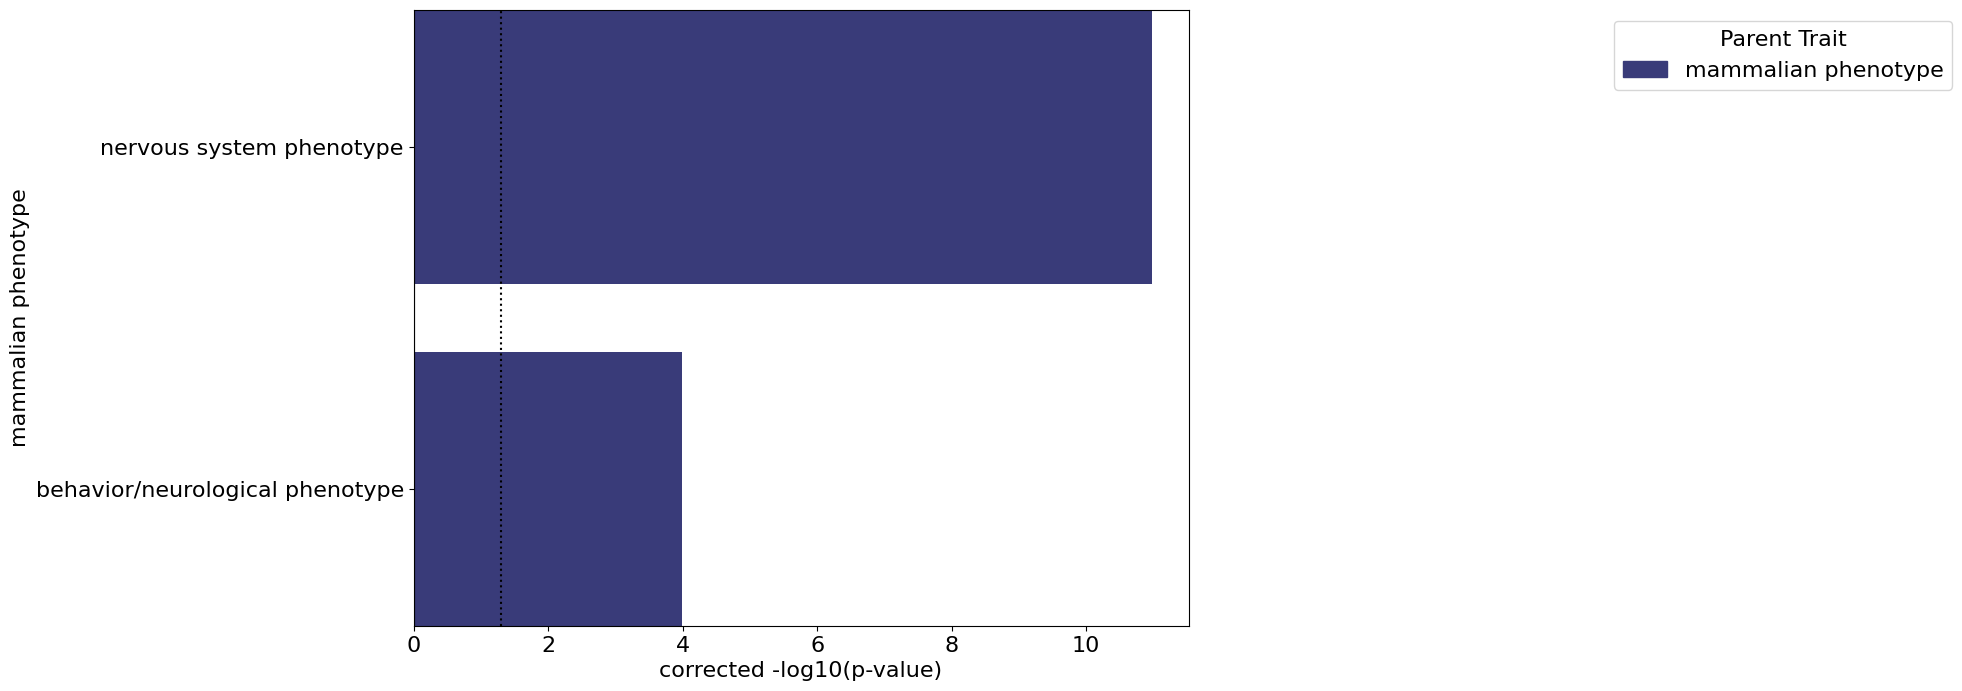

<Figure size 640x480 with 0 Axes>

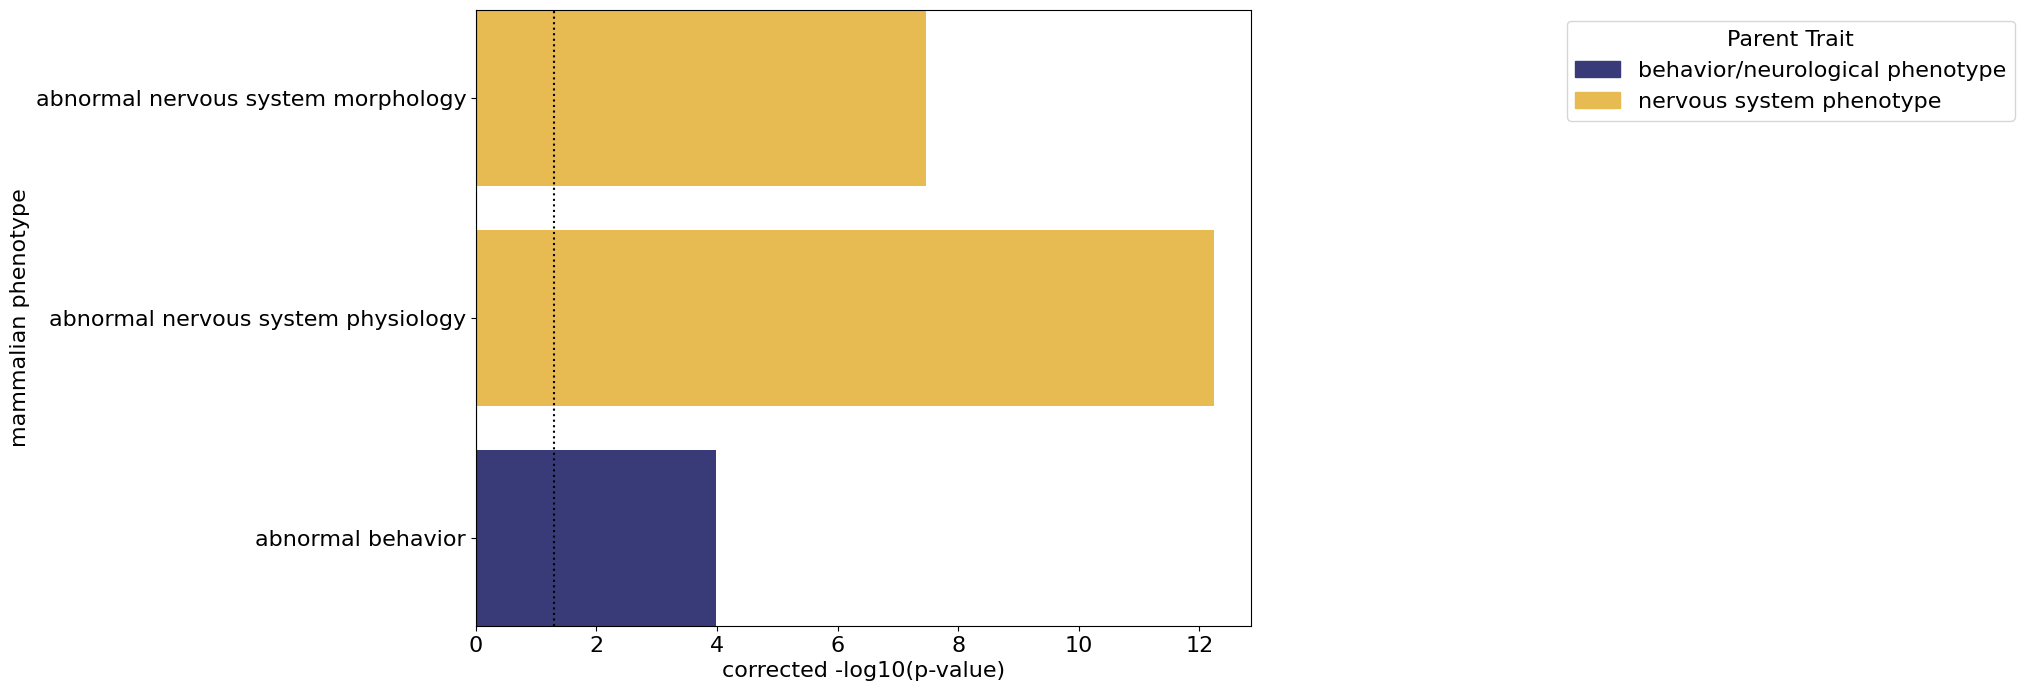

<Figure size 640x480 with 0 Axes>

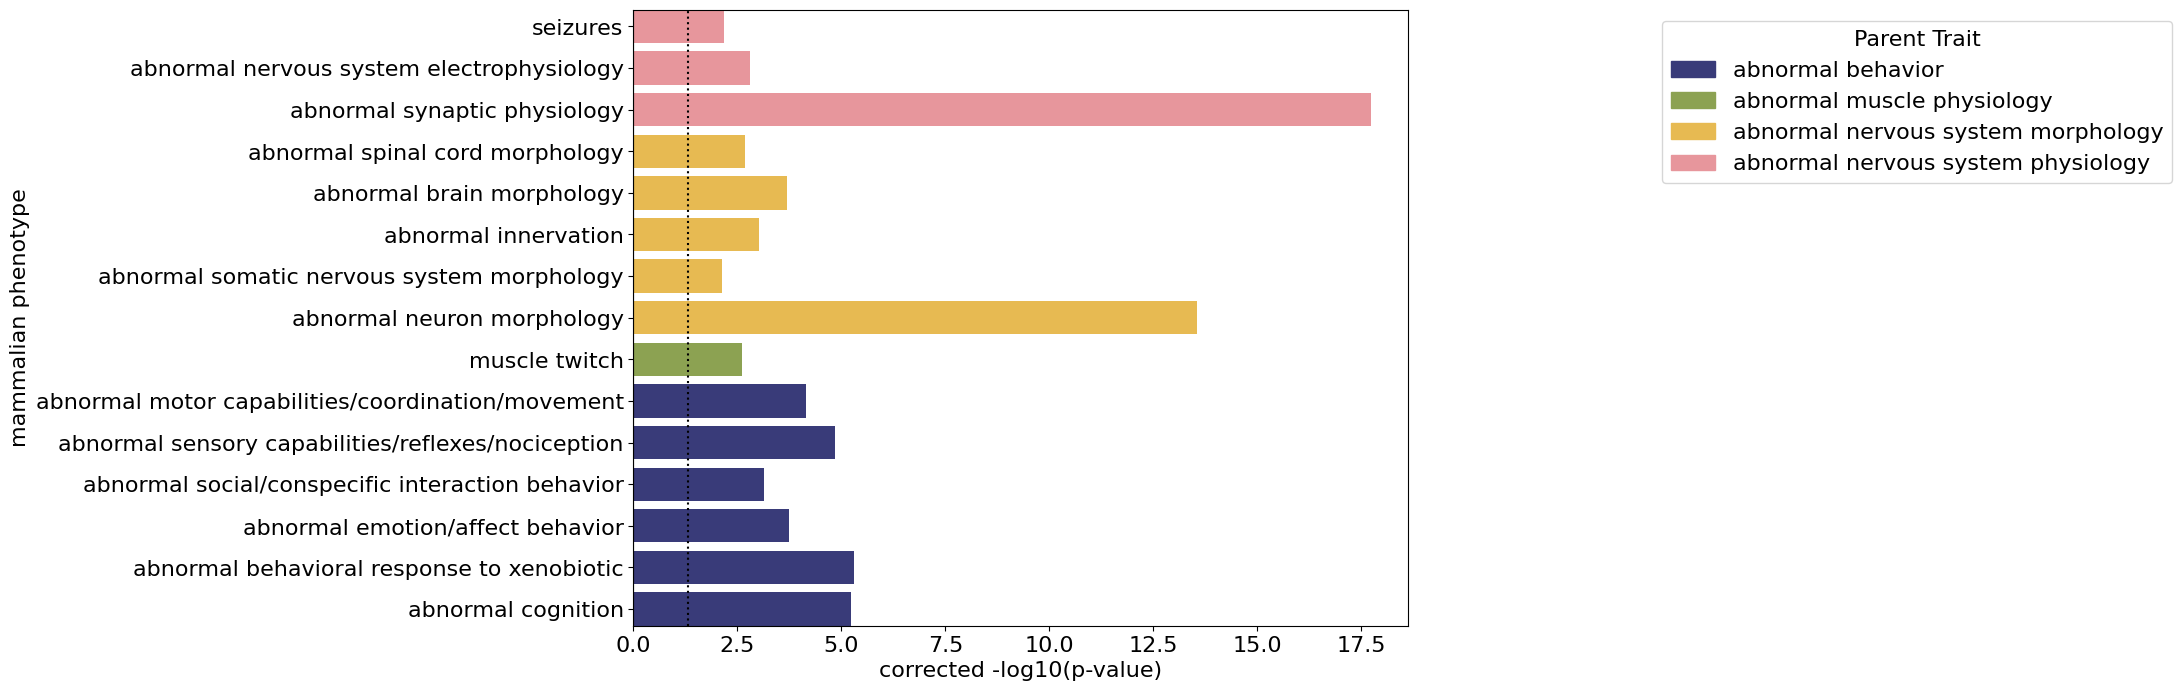

<Figure size 640x480 with 0 Axes>

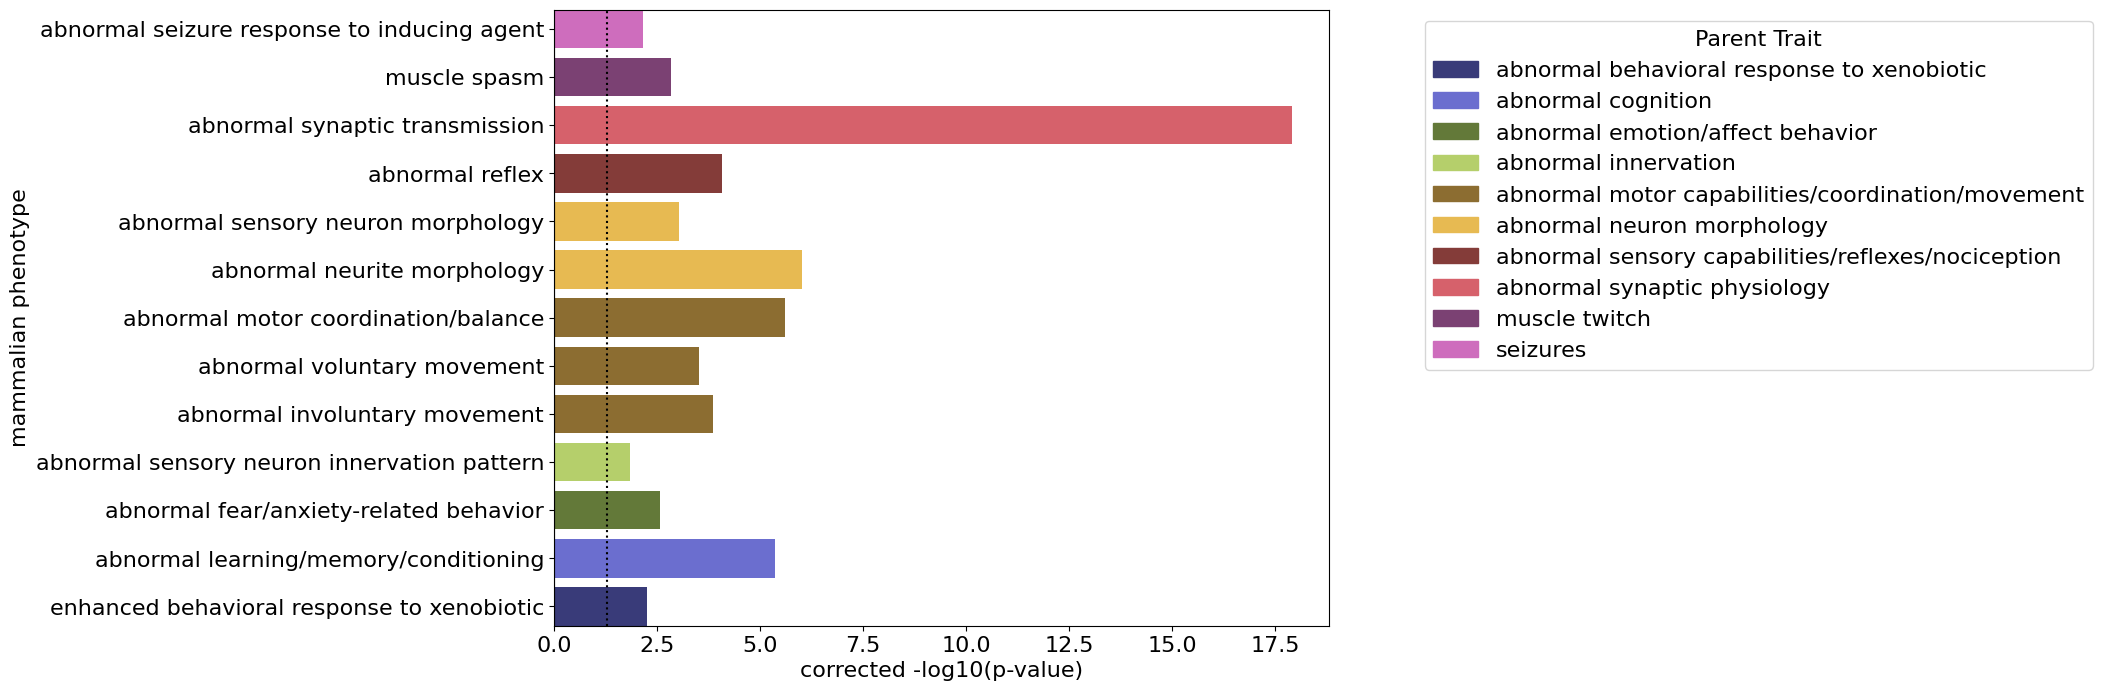

<Figure size 640x480 with 0 Axes>

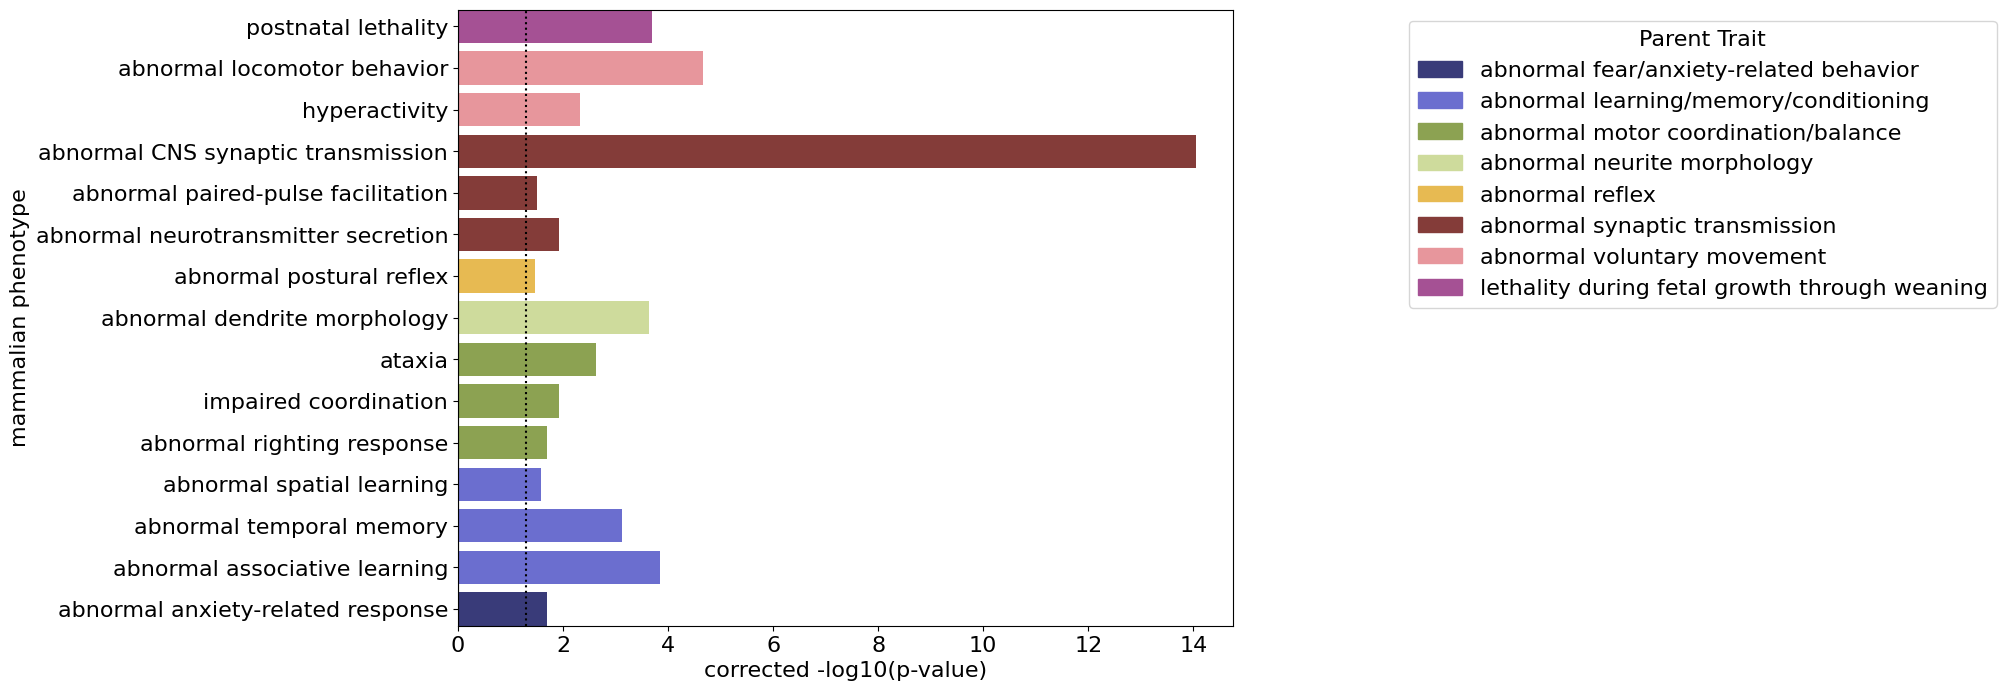

<Figure size 640x480 with 0 Axes>

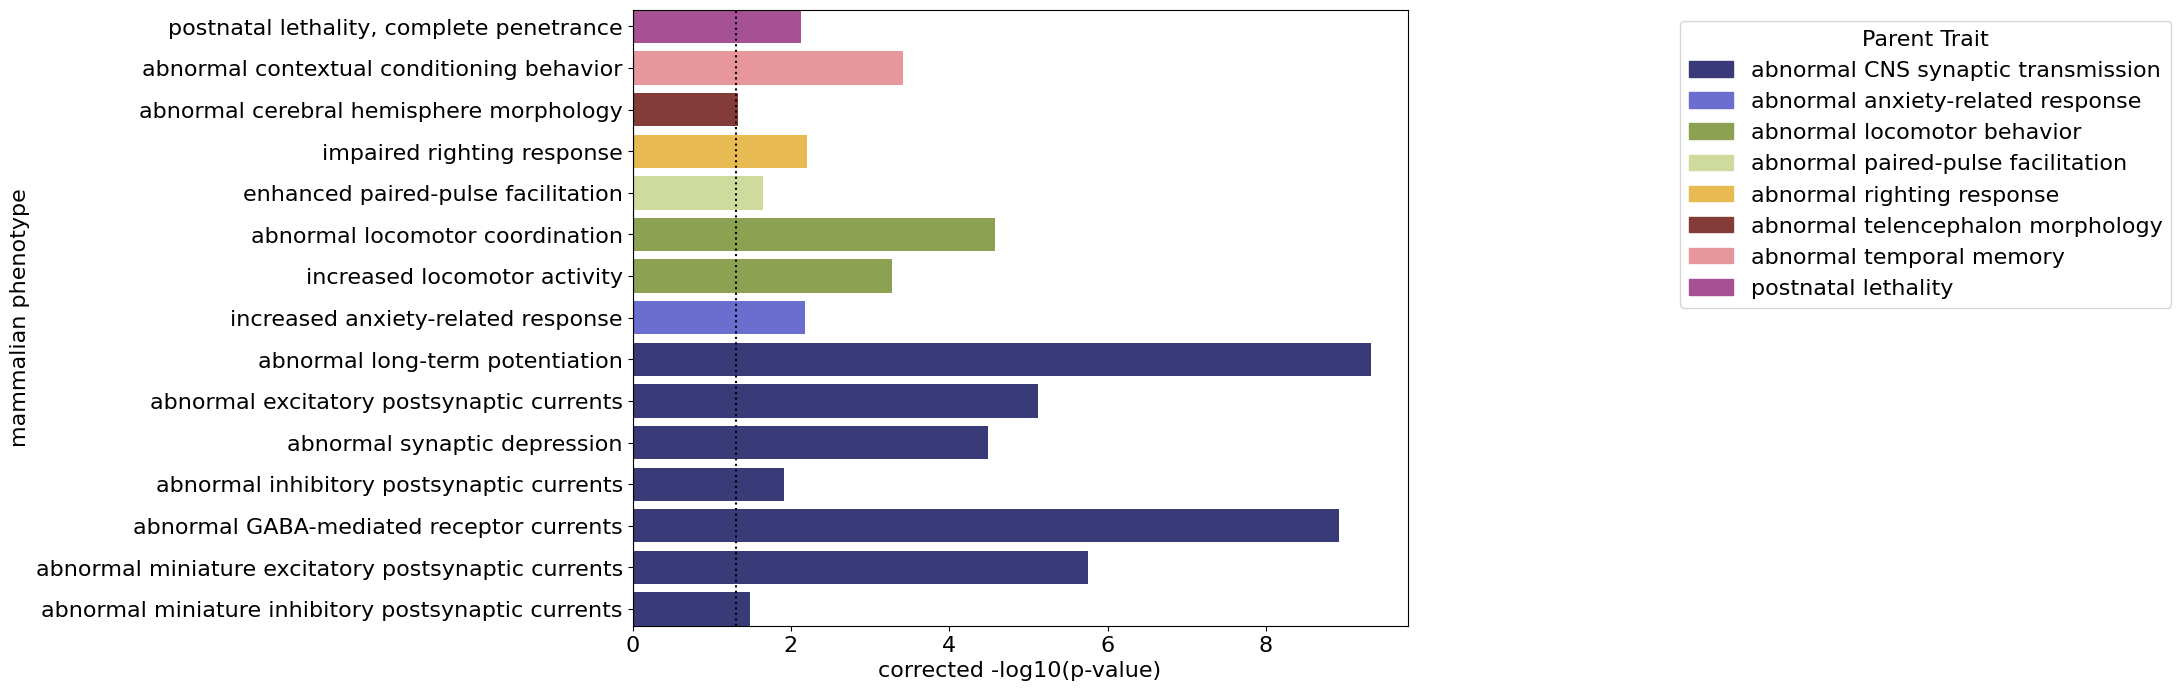

<Figure size 640x480 with 0 Axes>

In [24]:
for d in range(0, max(MGI.depth)+1):
    t = MGI[MGI['depth'] == d]
    t=t[t['p_intersect']<0.05/len(MGI)]
    t=t.sort_values('parent_trait',ascending=True)
    # Assign a unique color for each parent_trait based on its index
    unique_traits = t.parent_trait.unique()
    color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}
    
    # Plotting
    fig = plt.figure(figsize=(10, 8))
    colors = [color_mapping[trait] for trait in t.parent_trait]  # Color assignment based on parent_trait
    
    plt.barh(y=t.trait, width=-np.log10(t.p_intersect*len(MGI)),label=t.parent_trait, color=colors)
    
    plt.ylabel('mammalian phenotype')
    plt.xlabel('corrected -log10(p-value)')
    plt.axvline(-np.log10(0.05), color='black', ls=':')
    plt.axvline(0, color='black', ls='-')

    #plt.xticks(rotation=90)
    #plt.title(d)
    # Create legend patches (only one for each unique parent_trait)
    legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]
    
    # Add legend to the plot
    plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
    plt.tight_layout()
    plt.margins(y=0)
    # Show the plot
    plt.savefig(('MGI_val_depth-'+str(d)+'.svg'), bbox_inches = "tight")
    plt.show()
    
    # Clear the figure after showing
    plt.clf()

In [25]:
t

,index,trait,parent_trait,network_genes,odds_ratio,log_se_or,p_intersect,depth
2744,3520,abnormal miniature inhibitory postsynaptic cur...,abnormal CNS synaptic transmission,"{'VPS54', 'GABRA1', 'GABRB1', 'GABRA2', 'TBR1'...",8.715158,0.386991,1.091194e-05,5
2746,3522,abnormal miniature excitatory postsynaptic cur...,abnormal CNS synaptic transmission,"{'NRXN3', 'CACNG3', 'GRIN2B', 'LRRTM4', 'VAMP2...",8.022450,0.268133,5.797612e-10,5
2747,3523,abnormal GABA-mediated receptor currents,abnormal CNS synaptic transmission,"{'VPS54', 'GABRA4', 'NRXN3', 'GABRA1', 'GABRA3...",60.014368,0.464221,3.911672e-13,5
2749,3525,abnormal inhibitory postsynaptic currents,abnormal CNS synaptic transmission,"{'VPS54', 'GABRA1', 'SYN1', 'NOVA2', 'SCN1A', ...",7.261184,0.343372,3.974891e-06,5
2751,3527,abnormal synaptic depression,abnormal CNS synaptic transmission,"{'DISC1', 'NRXN3', 'GRM1', 'LAMA2', 'SYN1', 'G...",7.606461,0.283569,1.063738e-08,5
2753,3529,abnormal excitatory postsynaptic currents,abnormal CNS synaptic transmission,"{'NRXN3', 'GRIA2', 'GRM1', 'CACNG3', 'TBR1', '...",7.212650,0.266535,2.478802e-09,5
2755,3531,abnormal long-term potentiation,abnormal CNS synaptic transmission,"{'NHLRC1', 'DLG4', 'SLC8A2', 'ERBB4', 'PTPRD',...",7.032558,0.215209,1.559497e-13,5
2955,3916,increased anxiety-related response,abnormal anxiety-related response,"{'DLG4', 'NEUROD2', 'STXBP1', 'GNAO1', 'DGKI',...",3.752528,0.240806,2.197831e-06,5
2319,2808,increased locomotor activity,abnormal locomotor behavior,"{'ADGRL3', 'DISC1', 'GRIA2', 'CSMD1', 'GABRA3'...",5.247291,0.262615,1.720608e-07,5
2323,2813,abnormal locomotor coordination,abnormal locomotor behavior,"{'GLRB', 'VPS54', 'B4GALNT1', 'NEUROD2', 'STRB...",3.126168,0.177127,8.675052e-09,5


NameError: name 'save_fig' is not defined

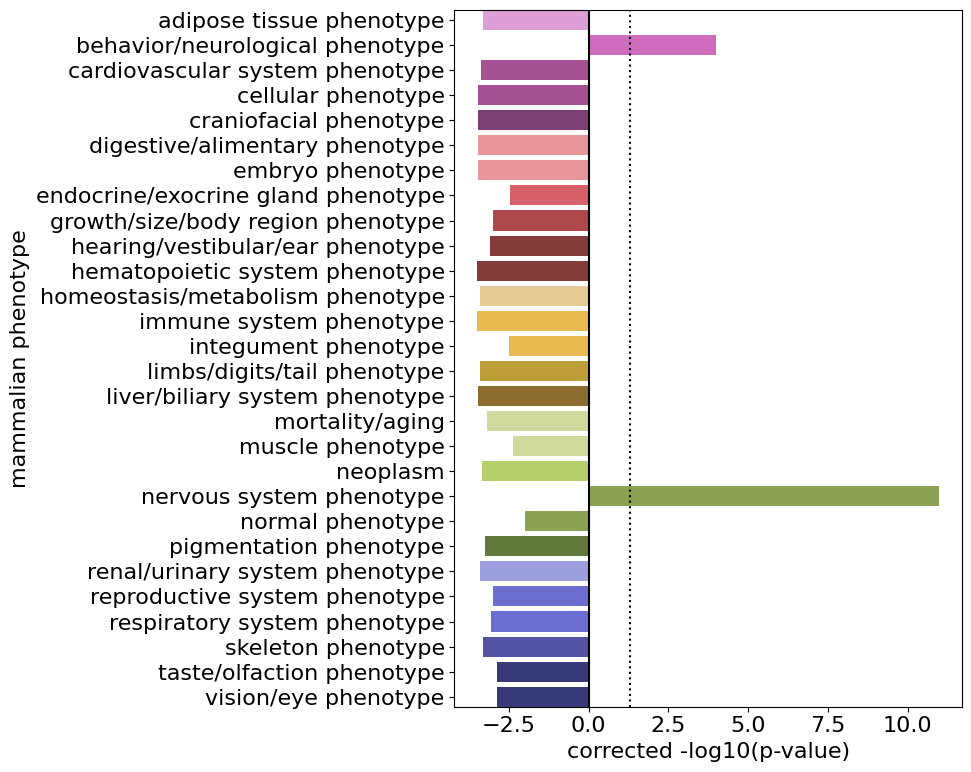

In [26]:
d=0

t = MGI[MGI['depth'] == d]
t=t.sort_values('trait',ascending=False)
#t=t[t['p_intersect']<0.05/len(t)]
# Assign a unique color for each parent_trait based on its index
unique_traits = t.trait.unique()
color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}

# Plotting
fig = plt.figure(figsize=(10, 8))
colors = [color_mapping[trait] for trait in t.trait]  # Color assignment based on parent_trait

plt.barh(y=t.trait, width=-np.log10(t.p_intersect*len(MGI)),label=t.parent_trait, color=colors)

plt.ylabel('mammalian phenotype')
plt.xlabel('corrected -log10(p-value)')
plt.axvline(-np.log10(0.05), color='black', ls=':')
plt.axvline(0, color='black', ls='-')

#plt.xticks(rotation=90)
#plt.title(d)
# Create legend patches (only one for each unique parent_trait)
legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]

# Add legend to the plot
#plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
plt.tight_layout()
plt.margins(y=0)
# Show the plot
if save_fig:
    plt.savefig(('MGI_val_depth-'+str(d)+'.svg'), bbox_inches = "tight")
#plt.savefig(('MGI_val_depth-'+str(d)+'.svg'), bbox_inches = "tight")
plt.show()

# Clear the figure after showing
plt.clf()

In [ ]:
t

In [ ]:
colors=(['#A55194']*6)+['#E7969C']+(['#B5CF6B']*8)
colors

In [ ]:
legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]
legend_patches

In [ ]:
 {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}


In [ ]:
color_mapping={'muscle phenotype':'#E7969C',
'nervous system phenotype':'#B5CF6B',
'behavior/neurological phenotype':'#A55194'}

In [ ]:
d=2
t = MGI[MGI['depth'] == d]
t['grand_parent_trait']=[par_dict[k] for k in t.parent_trait]
t=t[t['p_intersect']<0.05/len(MGI)]
t=t.sort_values('grand_parent_trait',ascending=True).reset_index()


# Assign a unique color for each parent_trait based on its index
unique_traits = set(t.grand_parent_trait)
#color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}
color_mapping={'muscle phenotype':'#E7969C',
'nervous system phenotype':'#B5CF6B',
'behavior/neurological phenotype':'#A55194'}
# Plotting
fig = plt.figure(figsize=(10, 8))
colors = [color_mapping[trait] for trait in t.grand_parent_trait]  # Color assignment based on parent_trait

#colors=(['#A55194']*6)+['#E7969C']+(['#B5CF6B']*8)
plt.barh(y=t.trait, width=-np.log10(t.p_intersect*len(MGI)),label=t.grand_parent_trait, color=colors)

plt.ylabel('mammalian phenotype')
plt.xlabel('corrected -log10(p-value)')
plt.axvline(-np.log10(0.05), color='black', ls=':')
#plt.xticks(rotation=90)
#plt.title(d)
# Create legend patches (only one for each unique parent_trait)
legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]

# Add legend to the plot
plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
plt.tight_layout()
plt.margins(y=0)
# Show the plot
if save_fig:
    plt.savefig(('MGI_val_depth-'+str(d)+'.svg'), bbox_inches = "tight")

plt.show()

# Clear the figure after showing
plt.clf()

# plot GWAS Catalog

In [ ]:
GC

In [ ]:
par_dict=GC[GC['depth']==1][['trait','parent_trait']]
par_dict.index=par_dict.trait
par_dict=par_dict['parent_trait'].to_dict()

In [ ]:
GC

In [ ]:
for v in set(par_dict.values()):
    d=2
    t = MGI[MGI['depth'] == d]
    t['grand_parent_trait']=[par_dict[k] for k in t.parent_trait]
    t=t[t['p_intersect']<0.05/len(t)]
    t=t.sort_values('grand_parent_trait',ascending=True).reset_index()
    
    
    # Assign a unique color for each parent_trait based on its index
    unique_traits = set(t.grand_parent_trait)
    color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}
    
    # Plotting
    fig = plt.figure(figsize=(10, 8))
    colors = [color_mapping[trait] for trait in t.grand_parent_trait]  # Color assignment based on parent_trait
    
    plt.barh(y=t.trait, width=-np.log10(t.p_intersect),label=t.grand_parent_trait, color=colors)
    
    plt.ylabel('mammalian phenotype')
    plt.xlabel('-log10(p-value)')
    plt.axvline(-np.log10(0.05/len(t)), color='black', ls=':')
    #plt.xticks(rotation=90)
    #plt.title(d)
    # Create legend patches (only one for each unique parent_trait)
    legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]
    
    # Add legend to the plot
    plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
    plt.tight_layout()
    plt.margins(y=0)
    # Show the plot
    plt.show()
    
    # Clear the figure after showing
    plt.clf()

In [ ]:
d=2
t = MGI[MGI['depth'] == d]
t['grand_parent_trait']=[par_dict[k] for k in t.parent_trait]
t=t[t['p_intersect']<0.05/len(t)]
t=t.sort_values('grand_parent_trait',ascending=True).reset_index()


# Assign a unique color for each parent_trait based on its index
unique_traits = set(t.grand_parent_trait)
color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}

# Plotting
fig = plt.figure(figsize=(10, 8))
colors = [color_mapping[trait] for trait in t.grand_parent_trait]  # Color assignment based on parent_trait

plt.barh(y=t.trait, width=-np.log10(t.p_intersect),label=t.grand_parent_trait, color=colors)

plt.ylabel('mammalian phenotype')
plt.xlabel('-log10(p-value)')
plt.axvline(-np.log10(0.05/len(t)), color='black', ls=':')
#plt.xticks(rotation=90)
#plt.title(d)
# Create legend patches (only one for each unique parent_trait)
legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]

# Add legend to the plot
plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
plt.tight_layout()
plt.margins(y=0)
# Show the plot
plt.show()

# Clear the figure after showing
plt.clf()

In [ ]:
for d in range(0, max(GC.depth)+1):
    t = GC[GC['depth'] == d]
    t=t[t['p_intersect']<0.05/len(t)]
    t=t.sort_values('parent_trait',ascending=True)
    # Assign a unique color for each parent_trait based on its index
    unique_traits = t.parent_trait.unique()
    color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}
    
    # Plotting
    fig = plt.figure(figsize=(10, 20))
    colors = [color_mapping[trait] for trait in t.parent_trait]  # Color assignment based on parent_trait
    
    plt.barh(y=t.trait, width=-np.log10(t.p_intersect),label=t.parent_trait, color=colors)
    
    plt.ylabel('mammalian phenotype')
    plt.xlabel('-log10(p-value)')
    plt.axvline(-np.log10(0.05/len(t)), color='black', ls=':')
    #plt.xticks(rotation=90)
    #plt.title(d)
    # Create legend patches (only one for each unique parent_trait)
    legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]
    
    # Add legend to the plot
    plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
    plt.tight_layout()
    plt.margins(y=0)
    # Show the plot
    plt.show()
    
    # Clear the figure after showing
    plt.clf()

In [ ]:
for d in range(0, max(GC.depth)+1):
    t = GC[GC['depth'] == d]
    t=t[t['p_intersect']<0.05/len(t)]
    cut=0.05/len(t)
    t=t.sort_values('parent_trait',ascending=True)
    subset='experimental factor'
    t=t[t['trait'].isin(par_dict[subset])]
    # Assign a unique color for each parent_trait based on its index
    unique_traits = t.parent_trait.unique()
    color_mapping = {trait: colormap(i / len(unique_traits)) for i, trait in enumerate(unique_traits)}
    
    # Plotting
    fig = plt.figure(figsize=(10, 30))
    colors = [color_mapping[trait] for trait in t.parent_trait]  # Color assignment based on parent_trait
    
    plt.barh(y=t.trait, width=-np.log10(t.p_intersect),label=t.parent_trait, color=colors)
    
    plt.ylabel('mammalian phenotype')
    plt.xlabel('-log10(p-value)')
    plt.axvline(-np.log10(cut), color='black', ls=':')
    #plt.xticks(rotation=90)
    #plt.title(d)
    # Create legend patches (only one for each unique parent_trait)
    legend_patches = [mpatches.Patch(color=color_mapping[trait], label=trait) for trait in unique_traits]
    
    # Add legend to the plot
    plt.legend(handles=legend_patches, title='Parent Trait', loc='upper right',bbox_to_anchor=(2, 1))
    #plt.tight_layout()
    plt.margins(y=0)
    # Show the plot
    if save_fig:
        plt.savefig(('GWAS_cat_val_depth-'+str(d)+'_subset_'+subset+'.tiff'),dpi=500, bbox_inches = "tight")
    plt.show()

    # Clear the figure after showing
    plt.clf()

In [ ]:
par_dict.keys()